# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [3]:
# your answer here
employee = pd.read_csv('/Users/olhapopova/Documents/GitHub/lab-pivot-table-and-correlation/your_code/data/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [14]:
# Method 1
# your answer here
employee.groupby(['Department']).agg({'Salary': np.mean})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [15]:
# Method 2
# your answer here
table = pd.pivot_table(employee, values=['Salary'], index=['Department'], 
                       aggfunc={'Salary': np.mean})
table

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [16]:
# your answer here
table = pd.pivot_table(employee, values=['Salary'], index=['Department', 'Title'], 
                       aggfunc={'Salary': np.mean})
table

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [28]:
# your answer here
table = employee.pivot_table(index=['Title', 'Years'], values = ['Salary'])
table

Salary
Title     Years        
VP        8          70
analyst   1          35
          2          30
          4          35
associate 2          55
          3          55
          7          60

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [57]:
# your answer here
table = pd.pivot_table(employee, values=['Salary', 'Name'], index=['Department', 'Title'], 
                       aggfunc={'Salary': np.mean,
                               'Name': 'count'})
table

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [59]:
# your answer here
table = pd.pivot_table(employee, values=['Salary'], index=['Department', 'Title'], 
                       aggfunc = [min, max, np.median, np.std])
table

# we can see that std for salary Sales associate is 0, because there are two equal salaries
# std for salary of HR VP, IT VP and IT assocaite is NaN because we try to find std after
# grouping by only 1 row (we have unique employees)

min    max median       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP            70     70   70.0       NaN
           analyst       30     35   32.5  3.535534
IT         VP            70     70   70.0       NaN
           analyst       30     35   32.5  3.535534
           associate     60     60   60.0       NaN
Sales      associate     55     55   55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [60]:
# your answer here
table.fillna(0)

# i think 0 as std can be more correct, because it shows the equal value for salary (even if
# we have the only value)

min    max median       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP            70     70   70.0  0.000000
           analyst       30     35   32.5  3.535534
IT         VP            70     70   70.0  0.000000
           analyst       30     35   32.5  3.535534
           associate     60     60   60.0  0.000000
Sales      associate     55     55   55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [61]:
# your answer here
table = pd.pivot_table(employee, values=['Salary', 'Name'], index=['Department'], 
                       aggfunc={'Salary': 'sum',
                               'Name': 'count'})
table

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [62]:
# your answer here
table = pd.pivot_table(employee, values=['Salary', 'Years'], index=['Department', 'Title'], 
                       aggfunc={'Salary': np.mean,
                               'Years': 'sum'})
table

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [63]:
# your answer here
fitbit = pd.read_csv('/Users/olhapopova/Documents/GitHub/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [64]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [67]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [69]:
# your answer here
cor1 = fitbit[['Steps','Minutes Very Active']].corr()
cor1

,Steps,Minutes Very Active
Steps,1.000000,0.571452
Minutes Very Active,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

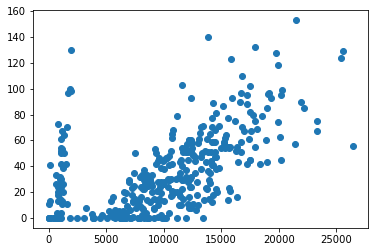

In [70]:
# your answer here
plt.scatter(x = fitbit['Steps'], y = fitbit['Minutes Very Active'])
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here

# it is obvious that those two variables have relationship and our correlation shows that it 
# positive regression and it has pretty strong relation, but from grapgh it is hard to say 
# that this relationship is linear, because we see two strong posibilites for linear 
# regression. Or one, what has more data arund, but with many random errors

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [71]:
# your answer here
cor2 = fitbit[['Steps','Minutes Sedentary']].corr()
cor2

,Steps,Minutes Sedentary
Steps,1.000000,0.076906
Minutes Sedentary,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

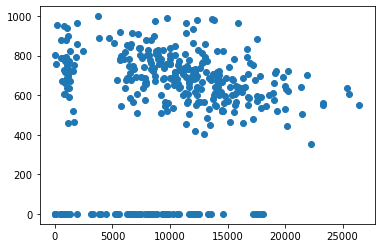

In [72]:
# your answer here
plt.scatter(x = fitbit['Steps'], y = fitbit['Minutes Sedentary'])
plt.show()

In [ ]:
# it looks like those two veriables has anti-correlation relatiotship by graph with many
# random errors far away from assumed linear regressin (many data just in 0 without any 
# usefull info for us). But computed correlation shows us a positive direction, but very low
# chance of having any relatiotship

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [73]:
# your answer here
cor3 = fitbit[['Steps','MinutesOfSleep']].corr()
cor3

,Steps,MinutesOfSleep
Steps,1.000000,0.130986
MinutesOfSleep,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

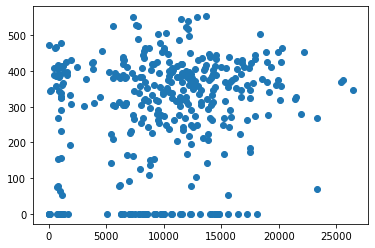

In [74]:
# your answer here
plt.scatter(x = fitbit['Steps'], y = fitbit['MinutesOfSleep'])
plt.show()

# correlation here is bigger than in previous example, but by graph i would not say that those
# variables have any linear relationship, data are too discrete 

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [76]:
# your answer here
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]. corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [77]:
# your answer here
cor_fit.sort_values(by = ['Steps'], ascending = False)

# based on correlation matrix results the highest correlation variable Steps has with 
# variable Minutes Very Active

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [79]:
# your answer here
time_grades = pd.read_csv('/Users/olhapopova/Documents/GitHub/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

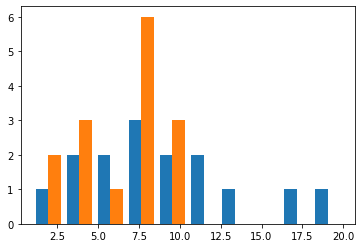

In [92]:
# your answer here
plt.hist(time_grades[['Study time', 'Grade']])
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [96]:
# your answer here
cor_pearson = time_grades[['Study time','Grade']].corr()
cor_pearson

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [97]:
cor_spearman = time_grades[['Study time','Grade']].corr(method = 'spearman')
cor_spearman 

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
# Spearman correlation is greater

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

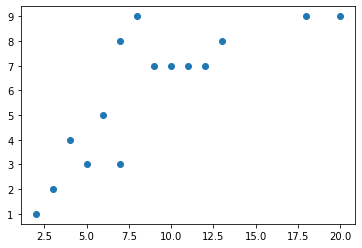

In [94]:
# your answer here
plt.scatter(x = time_grades['Study time'], y = time_grades['Grade'])
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here

# The Pearson correlation evaluates the linear relationship between two continuous variables.
# The Spearman correlation coefficient is based on the ranked values for each variable 
# rather than the raw data. Spearman correlation is often used to evaluate relationships 
# involving ordinal variables.

# But also based on lesson - we can see difference from graph. Linear graph most likely will 
# have better Pearson correlation, monotonic increasing graph most likely will have better
# Spearman correlation